**Университет ИТМО**

Курсовой проект "***Сравнительный анализ степени озеленения городского пространства в г. Санкт-Петербурге***"

Выполнили: студенты III курса факультета ИКТ Смирнов Тимур Олегович и Алексеев Павел Алексеевич, группа K33421.

*Санкт-Петербург, 2022*

# Описание данных

In [ ]:
import numpy as np
import pandas as pd
import re

Для анализа были выбраны 2 датасета: 

### [Зеленые насаждения общего пользования местного значения в Санкт-Петербурге  (Версия №1 от 22.04.2021)](https://classif.gov.spb.ru/irsi/7832000076-znop-mestnogo-znacheniya/structure_version/471/)

Размер: 4923 строк, 7 столбцов

Описание:



*   Район *(Район города)*	
*   Номер территории *(Условный номер объекта на территории Санкт-Петербурга)*	
*   Адрес *(Адрес объекта внутриквартального озеленения)*
*   Ориентировочная *(Площадь объекта внутриквартального озеленения, ориентировочная, га)*	
*   Основание *(Реквизиты документа, утверждающего перечень внутриквартального озеленения)*	
*   Муниципальное *(Наименование муниципального образования)*	
*   Дата внесения в базу *(Дата внесения объекта в базу данных)*	


In [ ]:
data_local = pd.read_csv('znop-mestnogo-znacheniya.csv')
data_local.head()

,Район,Номер территории,Адрес,Ориентировочная,Основание,Муниципальное,Дата внесения в базу
0,Адмиралтейский,32-1-1,"сквер б/н на наб. кан. Грибоедова, д. 164",0.16,Закон Санкт-Петербурга от 19.09.2007 № 430-85 ...,муниципальный округ Коломна,NaN
1,Адмиралтейский,32-1-2,"сквер б/н на наб. кан. Грибоедова, д. 166",0.09,Закон Санкт-Петербурга от 19.09.2007 № 430-85 ...,муниципальный округ Коломна,NaN
2,Адмиралтейский,32-1-3,"сквер б/н на Английском пр., д. 17-19",0.16,Закон Санкт-Петербурга от 19.09.2007 № 430-85 ...,муниципальный округ Коломна,NaN
3,Адмиралтейский,32-1-4,"сквер б/н в пер. Макаренко, д. 9",0.21,Закон Санкт-Петербурга от 19.09.2007 № 430-85 ...,муниципальный округ Коломна,NaN
4,Адмиралтейский,32-1-5,"сквер б/н на Садовой ул., д. 109",0.07,Закон Санкт-Петербурга от 19.09.2007 № 430-85 ...,муниципальный округ Коломна,NaN


In [ ]:
data_local['Основание'].unique()

array(['Закон Санкт-Петербурга от 19.09.2007 № 430-85 «О зеленых насаждениях общего пользования»',
       nan,
       'Закон Санкт-Петербурга от 19.09.2007 № 430-85 «О зеленых насаждениях общего пользования»79-59'],
      dtype=object)

Как можно заметить, такие столбцы как "Номер территории" (так как не понадобится в последующем анализе), "Основание" (так как имеет только 2 уникальных значения и не понадобится в последующем анализе) и "Дата внесения в базу" (так как все значения пустые) не имеют должной ценности, поэтому было принято решение их удалить

In [ ]:
data_local = data_local.drop(columns=["Номер территории", "Основание", "Дата внесения в базу", "Муниципальное"]).rename(columns={'Ориентировочная': 'Площадь'})
data_local

,Район,Адрес,Площадь
0,Адмиралтейский,"сквер б/н на наб. кан. Грибоедова, д. 164",0.1600
1,Адмиралтейский,"сквер б/н на наб. кан. Грибоедова, д. 166",0.0900
2,Адмиралтейский,"сквер б/н на Английском пр., д. 17-19",0.1600
3,Адмиралтейский,"сквер б/н в пер. Макаренко, д. 9",0.2100
4,Адмиралтейский,"сквер б/н на Садовой ул., д. 109",0.0700
...,...,...,...
4918,Петроградский,сквер б/н на Лахтинской ул. у д. 34 по ул. Ленина,0.0960
4919,Красносельский,"сквер б/н севернее д. 15, корп. 2, по Петергоф...",0.4633
4920,Колпинский,сквер б/н восточнее д. 3 по ул. Максима Горько...,0.3715
4921,Кировский,сквер б/н восточнее д. 15 и д. 17 по ул. Марша...,0.1583


### [Зеленые насаждения общего пользования городского значения в Санкт-Петербурге (Версия №1 от 22.04.2021)](https://classif.gov.spb.ru/irsi/7832000076-znop-gorodskogo-znacheniya/structure_version/472/?page=6&per_page=10)

Размер: 2073 строк, 5 столбцов

Описание:

*   Район города *(Указание района города, где находится объект зеленых насаждений общего пользования)*
*   Номер по списку *(Номер объекта в соответствии с Приложением к Закону Санкт-Петербурга от 12.02.2014 № 69-16 "О внесении изменений в Закон Санкт-Петербурга О зеленых насаждениях общего пользования")*
*   Наименование *(Наименование объекта зеленых насаждений общего пользования и описание его местоположения)*
*   Площадь, га *(Ориентировочная площадь объекта зеленых насаждений общего пользования в соответствии с Законом Санкт-Петербурга от 12.02.2014 № 69-16 "О внесении изменений в Закон Санкт-Петербурга О зеленых насаждениях общего пользования")*
*   Основание *(Основание для включения объекта в перечень зеленых насаждений общего пользования Санкт-Петербурга)*

In [ ]:
data_urban = pd.read_csv('znop-gorodskogo-znacheniya.csv')
data_urban.head()

,Район города,Номер по списку,Наименование,"Площадь, га",Основание
0,Кировский,5046,"сквер б/н на ул.Васи Алексеева, д.16",0.63,Закон Санкт-Петербурга от 19.09.2007 № 430-85 ...
1,Кировский,5058,"сквер б/н на Двинской ул., д.16, корп.1",0.42,Закон Санкт-Петербурга от 19.09.2007 № 430-85 ...
2,Кировский,5061,Молвинский сад на Промышленной ул. между д.17 ...,4.45,Закон Санкт-Петербурга от 19.09.2007 № 430-85 ...
3,Кировский,5065,Кировский сквер на Кировской пл.,1.13,Закон Санкт-Петербурга от 19.09.2007 № 430-85 ...
4,Кировский,5066,"сад Девятого Января между ул.Маршала Говорова,...",11.30,Закон Санкт-Петербурга от 19.09.2007 № 430-85 ...


In [ ]:
data_urban['Основание'].unique()

array(['Закон Санкт-Петербурга от 19.09.2007 № 430-85 «О зеленых насаждениях общего пользования»'],
      dtype=object)

Как можно заметить, такие столбцы как "Номер по списку" (так как не понадобится в последующем анализе) и "Основание" (так как имеет только 1 уникальное значение) не имеют должной ценности, поэтому было принято решение их удалить

In [ ]:
data_urban = data_urban.drop(columns=["Номер по списку", "Основание"]).rename(columns={'Площадь, га': 'Площадь', 'Наименование': 'Адрес', 'Район города': 'Район'})
data_urban

,Район,Адрес,Площадь
0,Кировский,"сквер б/н на ул.Васи Алексеева, д.16",0.6300
1,Кировский,"сквер б/н на Двинской ул., д.16, корп.1",0.4200
2,Кировский,Молвинский сад на Промышленной ул. между д.17 ...,4.4500
3,Кировский,Кировский сквер на Кировской пл.,1.1300
4,Кировский,"сад Девятого Января между ул.Маршала Говорова,...",11.3000
...,...,...,...
2068,Центральный,бульвар б/н по наб. Обводного кан. от Кременчу...,0.4860
2069,Центральный,бульвар б/н на Синопской наб. у Большеохтинско...,0.6060
2070,Центральный,бульвар б/н на ул. Черняховского,0.5840
2071,Центральный,"Калужский сквер в Калужском пер., д.9",0.4900


### Объединение и очистка данных. Нахождение координат по адресу

Полученный датасет имеет размерность в 6996 строк и 3 столбца

In [ ]:
data = pd.concat([data_urban, data_local])
print(data.shape)
data.head()

(6996, 3)


,Район,Адрес,Площадь
0,Кировский,"сквер б/н на ул.Васи Алексеева, д.16",0.63
1,Кировский,"сквер б/н на Двинской ул., д.16, корп.1",0.42
2,Кировский,Молвинский сад на Промышленной ул. между д.17 ...,4.45
3,Кировский,Кировский сквер на Кировской пл.,1.13
4,Кировский,"сад Девятого Января между ул.Маршала Говорова,...",11.30


Напишем функцию очистки адреса для того, чтобы потом найти координаты 

In [ ]:
def clear_urban(txt):
  txt = re.sub(',', ' ', str(txt))
  txt = re.sub('сквер б/н', '', str(txt))
  txt = re.sub('наб\.|д\.|кан\.|пос\.|г\.', ' ', str(txt))
  txt = re.sub('ул\.', 'улица ', str(txt))
  txt = re.sub(' р\. ', ' ', str(txt))
  txt = re.sub('пер\.', 'переулок ', str(txt))
  txt = re.sub('дор\.', 'дорога ', str(txt))
  txt = re.sub('пр\.', 'проспект ', str(txt)) 
  txt = re.sub('пл\.', 'площадь ', str(txt)) 
  txt = re.sub('литера ', 'лит', str(txt)) 
  txt = re.sub('корп\. |корп\. ', 'к', str(txt)) 
  txt = re.sub('к\d+', ' ', str(txt)) 
  txt = re.sub('косе', 'коса', str(txt)) 
  txt = re.sub('д\.', ' ', str(txt))
  txt = re.sub('Б\.', 'Большая ', str(txt))
  txt = re.sub('М\.', 'Малая ', str(txt))
  txt = re.sub('-й', '-я', str(txt))
  txt = re.sub('аллее', 'аллея', str(txt))
  
  txt = re.sub('Дровяному', 'Дровяной', str(txt))

  if 'шоссе' in txt:
    txt = re.sub('кого|ский|кому', 'кое', str(txt))
  else:
    txt = re.sub('кому', 'кий', str(txt))
    txt = re.sub('ком', 'кий', str(txt))
    txt = re.sub('кой', 'кая', str(txt)) if 'Крупской' not in txt else txt
    txt = re.sub('ой', 'ая', str(txt))
    txt = re.sub('ному', 'ный', str(txt))
    txt = re.sub('ому', 'ой', str(txt))
  txt = re.sub("[\(\[].*?[\)\]]", "", txt)
  txt = txt.split(' и ')[1] if ' и ' in txt else txt
  txt = txt.split('б/н')[1] if 'б/н' in txt else txt
  txt = txt.split(' у ')[1] if ' у ' in txt else txt
  txt = txt.split(' от ')[0] if ' от ' in txt else txt
  txt = re.sub('между | северо-восточнее | северо-западнее | юго-восточнее | юго-западнее | севернее | восточнее | южнее | западнее | вдоль | во дворе | на | в ', ' ', str(txt))
  txt = re.sub(' по ', ' ', str(txt))
  txt = re.sub('о-ву|о-в', 'остров', str(txt)) 
  txt = re.sub('В. О.', 'В.О.', str(txt))
  txt = re.sub('р\.', ' река ', str(txt))
  return 'санкт петербург ' + txt

<string>:1: RuntimeWarning: coroutine 'get_new_data' was never awaited


Напишем функцию определения координат. Она принимает на вход адрес и выводит координаты с полным адресом

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from geopandas.tools import geocode

In [ ]:
def custom_geocoder(address):
    try:
      dataframe = geocode(address , provider="nominatim" , user_agent = 'my_request')
      point = dataframe.geometry.iloc[0]
      return pd.Series({'Latitude': point.y, 'Longitude': point.x, 'Полный адрес': dataframe.address.iloc[0]})
    except:
      return pd.Series({'Latitude': None, 'Longitude': None, 'Полный адрес': None})

Проведем очистку данных и посмотрим на результат

In [ ]:
data['Адрес'] = data['Адрес'].apply(lambda x: clear_urban(x))

In [ ]:
data.head(10)

,Район,Адрес,Площадь
0,Кировский,санкт петербург улица Васи Алексеева 16,0.63
1,Кировский,санкт петербург Двинская улица 16 корп.1,0.42
2,Кировский,санкт петербург 19,4.45
3,Кировский,санкт петербург Кировский сквер Кировская площ...,1.13
4,Кировский,санкт петербург проспект Стачек,11.30
5,Кировский,санкт петербург Охотничьего переулок,0.71
6,Кировский,санкт петербург улица Корнеева,1.95
7,Кировский,санкт петербург сад Кирьяново проспект Стачек ...,2.76
8,Кировский,санкт петербург Автовская улица,0.90
9,Кировский,санкт петербург улица Новостроек,3.82


Найдем координаты

In [ ]:
data[['latitude' , 'longitude', 'Полный адрес']]= data['Адрес'].apply( lambda x: custom_geocoder(x))

In [ ]:
data.head(10)

,Район,Адрес,Площадь,latitude,longitude,Полный адрес
0,Кировский,санкт петербург улица Васи Алексеева 16,0.63,59.879151,30.270631,"16, улица Васи Алексеева, Автово, округ Автово..."
1,Кировский,санкт петербург Двинская улица 16 корп.1,0.42,NaN,NaN,None
2,Кировский,санкт петербург 19,4.45,59.944531,30.491583,"Санкт-Петербург, 19, проспект Наставников, окр..."
3,Кировский,санкт петербург Кировский сквер Кировская площ...,1.13,NaN,NaN,None
4,Кировский,санкт петербург проспект Стачек,11.30,59.859766,30.255499,"проспект Стачек, округ Княжево, Санкт-Петербур..."
5,Кировский,санкт петербург Охотничьего переулок,0.71,NaN,NaN,None
6,Кировский,санкт петербург улица Корнеева,1.95,59.884380,30.272780,"улица Корнеева, Нарвский округ, Санкт-Петербур..."
7,Кировский,санкт петербург сад Кирьяново проспект Стачек ...,2.76,NaN,NaN,None
8,Кировский,санкт петербург Автовская улица,0.90,59.865436,30.261686,"Автовская улица, Автово, округ Автово, Санкт-П..."
9,Кировский,санкт петербург улица Новостроек,3.82,59.874162,30.271563,"улица Новостроек, Автово, округ Автово, Санкт-..."


Сохраним данный датасет. Теперь будем работать только с ним

In [ ]:
data.to_csv('data.csv')

Получилось около 80% найденных координат

In [ ]:
data[data['latitude'].notnull()].shape

(5567, 6)

# Анализ данных

### Подготовка геодатафрейма

Скачаем ранее полученный датасет

In [ ]:
data = pd.read_csv('data (1).csv').drop(columns=['Unnamed: 0', 'Адрес'])
data.head(10)

,Район,Площадь,latitude,longitude,Полный адрес
0,Кировский,0.63,59.879151,30.270631,"16, улица Васи Алексеева, Автово, округ Автово..."
1,Кировский,0.42,NaN,NaN,NaN
2,Кировский,4.45,59.944531,30.491583,"Санкт-Петербург, 19, проспект Наставников, окр..."
3,Кировский,1.13,NaN,NaN,NaN
4,Кировский,11.30,59.859766,30.255499,"проспект Стачек, округ Княжево, Санкт-Петербур..."
5,Кировский,0.71,NaN,NaN,NaN
6,Кировский,1.95,59.884380,30.272780,"улица Корнеева, Нарвский округ, Санкт-Петербур..."
7,Кировский,2.76,NaN,NaN,NaN
8,Кировский,0.90,59.865436,30.261686,"Автовская улица, Автово, округ Автово, Санкт-П..."
9,Кировский,3.82,59.874162,30.271563,"улица Новостроек, Автово, округ Автово, Санкт-..."


In [ ]:
data['Район'] = data['Район'].apply(lambda x: 'Красносельский' if x == 'Красносельский и Пет' else x)


In [ ]:
!pip install lets-plot geopandas
!pip install folium matplotlib mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.1 MB/s 
     |████████████████████████████████| 7.8 MB 37.8 MB/s 
     |████████████████████████████████| 16.6 MB 52.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data_coordinates = data[data['latitude'].notnull()]
data_coordinates

,Район,Площадь,latitude,longitude,Полный адрес
0,Кировский,0.6300,59.879151,30.270631,"16, улица Васи Алексеева, Автово, округ Автово..."
2,Кировский,4.4500,59.944531,30.491583,"Санкт-Петербург, 19, проспект Наставников, окр..."
4,Кировский,11.3000,59.859766,30.255499,"проспект Стачек, округ Княжево, Санкт-Петербур..."
6,Кировский,1.9500,59.884380,30.272780,"улица Корнеева, Нарвский округ, Санкт-Петербур..."
8,Кировский,0.9000,59.865436,30.261686,"Автовская улица, Автово, округ Автово, Санкт-П..."
...,...,...,...,...,...
6991,Петроградский,0.0960,60.083230,30.251004,"34, улица Ленина, Михайловка, Парголово, Санкт..."
6992,Красносельский,0.4633,59.848354,30.186739,"15 к1, Петергофское шоссе, Южно-Приморский окр..."
6993,Колпинский,0.3715,59.766997,30.128784,"3, улица Максима Горького, Горелово, округ Гор..."
6994,Кировский,0.1583,59.879954,30.268895,"17, улица Маршала Говорова, Автово, округ Авто..."


In [ ]:
import requests
from shapely.geometry import Point, shape, box
import plotly.express as px
import geopandas as gpd
from lets_plot import *
LetsPlot.setup_html()
import matplotlib.pyplot as plt

In [ ]:
def osm_boundaries(osm_id):
    response = requests.get('http://polygons.openstreetmap.fr/get_geojson.py?id={0}&params=0'.format(osm_id))
    return gpd.GeoDataFrame(geometry=[ shape(response.json()['geometries'][0]) ])

In [ ]:
spb_districts_ids = [1115082, 1114193, 1114252, 1114354, 1114806, 1114809, 
                     337424, 1114895, 363103, 1115366, 338636, 368287, 
                     1114905, 367375, 1115367, 338635, 369514, 1114902]
spb_gdf = pd.concat([osm_boundaries(osm_id) for osm_id in spb_districts_ids])

In [ ]:
spb_gdf['id_района'] = spb_districts_ids

In [ ]:
districts = pd.DataFrame(spb_districts_ids)

In [ ]:
districts['Название'] = ['Кронштадский', 'Адмиралтейский', 'Василеостровский',
                         'Выборгский', 'Калиниский', 'Кировский',
                         'Колпинский', 'Красногвардейский', 'Красноcельский',
                         'Курортный', 'Московский', 'Невский', 'Петроградский',
                         'Петродворцовый', 'Приморский', 'Пушкинский',
                         'Фрунзенский', 'Центральный']

In [ ]:
districts.columns = ['id_района', 'Название']

In [ ]:
districts['Население, чел'] = [44399, 158253, 209733, 533808, 546908, 339946, 183947, 369347, 426372, 82713, 340187, 546475, 117003, 134018, 692753, 255609, 416570, 203870]
districts['Общая площадь, м2'] = [19.53, 13.82, 21.47, 115.52, 40.18, 47.46, 102.25, 56.35, 90.49, 268.19, 73.07, 60.66, 19.54, 107.08, 109.90, 240.09, 37.52, 17.77]

In [ ]:
districts['Общая площадь, м2'] *= 1000000 # переводим км2 в м2

In [ ]:
districts = districts.merge(spb_gdf, left_on = 'id_района', right_on = 'id_района')

In [ ]:
sub_df  = pd.DataFrame(data['Район'].value_counts(dropna=False)).reindex(
    data['Район'].unique(), fill_value=0).reset_index(drop=False)

sub_df2 = pd.DataFrame(data.groupby('Район').sum()['Площадь']* 10000 ).reindex(  
    data['Район'].unique(), fill_value=0).reset_index(drop=False)                # га в м2

In [ ]:
sub_df.columns = ['Название', 'Количество зеленых насаждений']
sub_df2.columns = ['Название', 'Площадь зеленых насаждений, м2'] 

In [ ]:
sub_df = sub_df.sort_values(by=['Название'])
sub_df2 = sub_df2.sort_values(by=['Название'])

In [ ]:
districts = districts.sort_values(by=['Название'])

In [ ]:
districts['Количество зеленых насаждений, шт'] = sub_df['Количество зеленых насаждений']
districts['Площадь зеленых насаждений, %'] = sub_df2['Площадь зеленых насаждений, м2'] / districts['Общая площадь, м2'] * 100
districts['Площадь зеленых насаждений на человека, м2'] = sub_df2['Площадь зеленых насаждений, м2'] / districts['Население, чел']

In [ ]:
districts

,id_района,Название,"Население, чел","Общая площадь, м2",geometry,"Количество зеленых насаждений, шт","Площадь зеленых насаждений, %","Площадь зеленых насаждений на человека, м2"
1,1114193,Адмиралтейский,158253,13820000.0,"MULTIPOLYGON (((30.25023 59.90129, 30.25112 59...",118,18.536881,16.187984
2,1114252,Василеостровский,209733,21470000.0,"MULTIPOLYGON (((30.18468 59.95472, 30.18449 59...",409,5.159082,5.281262
3,1114354,Выборгский,533808,115520000.0,"MULTIPOLYGON (((30.07276 60.09727, 30.08512 60...",312,5.798543,12.548476
4,1114806,Калиниский,546908,40180000.0,"MULTIPOLYGON (((30.34405 59.97749, 30.34419 59...",610,11.313123,8.311477
5,1114809,Кировский,339946,47460000.0,"MULTIPOLYGON (((30.16799 59.88702, 30.16781 59...",285,24.125702,33.681991
6,337424,Колпинский,183947,102250000.0,"MULTIPOLYGON (((30.44112 59.82937, 30.44333 59...",285,6.460607,35.912361
8,363103,Красноcельский,426372,90490000.0,"MULTIPOLYGON (((30.04560 59.76554, 30.05226 59...",385,3.255716,6.909687
7,1114895,Красногвардейский,369347,56350000.0,"MULTIPOLYGON (((30.39591 59.92574, 30.39428 59...",274,9.927807,15.146513
0,1115082,Кронштадский,44399,19530000.0,"MULTIPOLYGON (((29.54297 60.04220, 29.54322 60...",499,21.706964,95.483457
9,1115366,Курортный,82713,268190000.0,"MULTIPOLYGON (((29.43890 60.17643, 29.43959 60...",542,2.833930,91.887805


In [ ]:
final_gdf = gpd.GeoDataFrame(districts, geometry = districts.geometry)
final_gdf['coords'] = final_gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
final_gdf['coords'] = [coords[0] for coords in final_gdf['coords']]
final_gdf.crs = "epsg:4326"

### Карта озеленения районов города относительно площади озеленения (в %)

In [ ]:
import folium

In [ ]:
mymap = folium.Map(
    location = [59.938732, 30.316229],    # широта и долгота Санкт-Петербурга
    zoom_start = 9
)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(mymap)

Построим карту озеленения районов относительно площади озеленения (в %)

In [ ]:
final_gdf.explore(m = mymap, column="Площадь зеленых насаждений, %", cmap='Greens', scheme="BoxPlot")

Как можно заметить, многие районы не так озелены, как может показаться в жизни. Это связанно с тем, что большая часть зеленых территорий в окраинных районах просто напросто не входит в перечень Зеленых насаждений общего пользования. В связи с этим, далее будем делать выводы исключая такие районы как: Петродворцовый, Красносельский, Пушкинский и Курортный

График самых озелененных районов (в %)

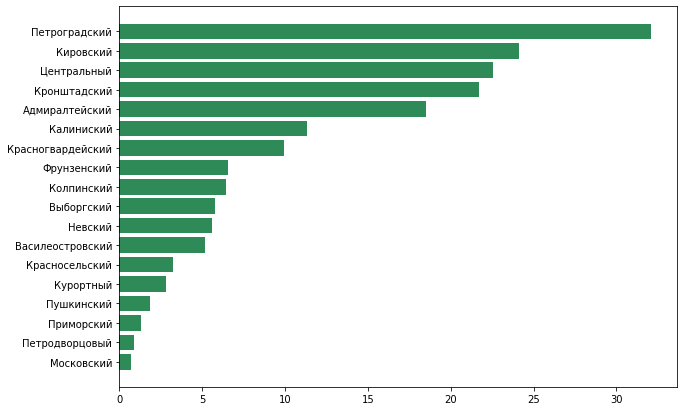

In [ ]:
name = final_gdf[['Название','Площадь зеленых насаждений, %']].sort_values(by='Площадь зеленых насаждений, %')['Название']
area = final_gdf[['Название','Площадь зеленых насаждений, %']].sort_values(by='Площадь зеленых насаждений, %')['Площадь зеленых насаждений, %']

fig = plt.figure(figsize =(10, 7))
plt.barh(name, area, color='seagreen')

plt.show()

### Карта озеленения районов города относительно площади зеленых насаждений на одного жителя (в м2)

Построим карту озеленения районов относительно площади зеленых насаждений на одного жителя (в м2)

In [ ]:
mymap = folium.Map(
    location = [59.938732, 30.316229],    # широта и долгота Санкт-Петербурга
    zoom_start = 9
)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(mymap)

In [ ]:
final_gdf.explore(m = mymap, column="Площадь зеленых насаждений на человека, м2", cmap='Greens', scheme="BoxPlot")

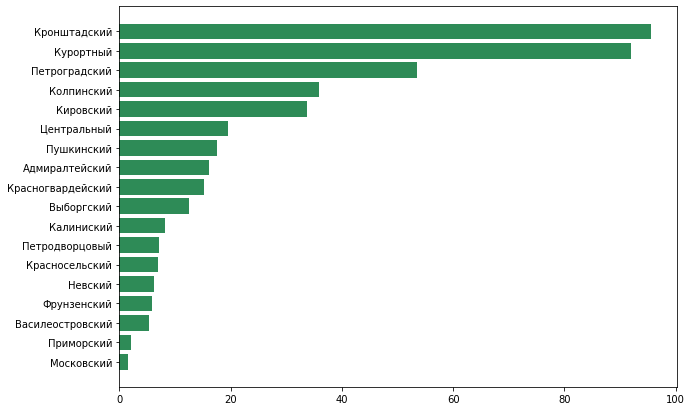

In [ ]:
name = final_gdf[['Название','Площадь зеленых насаждений на человека, м2']].sort_values(by='Площадь зеленых насаждений на человека, м2')['Название']
area = final_gdf[['Название','Площадь зеленых насаждений на человека, м2']].sort_values(by='Площадь зеленых насаждений на человека, м2')['Площадь зеленых насаждений на человека, м2']

fig = plt.figure(figsize =(10, 7))
plt.barh(name, area, color='seagreen')

plt.show()

Данная метрика уже гораздо больше соотносится с нашими наблюдениями. Однако выводы делать еще рано. Давайте построим карту зеленых насаждений, координаты которых нам удалось найти

### Карта зеленых насаждений общего пользования

In [ ]:
map = folium.Map(location=[59.9343, 30.3351], zoom_start = 9, control_scale=True)

In [ ]:
for i in range(len(data_coordinates)):
  folium.Circle(location=[data_coordinates['latitude'].values[i], data_coordinates['longitude'].values[i]], 
                    popup=folium.Popup(data_coordinates['Полный адрес'].values[i], max_width=150),
                    radius=np.sqrt(data_coordinates['Площадь'].values[i] * 10000 / np.pi), color="green", fill=True).add_to(map)

In [ ]:
map

Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


Маркеры расставлены не очень четко, но достаточно близко к конкретному месту. В нахождении координат по адресу через сторонние библиотеки имеются свои проблемы, в том числе проблемы с точностью.

# Выводы



1.   Самыми озелененными районами являются Петроградский (благодаря Каменному, Крестовскому и Петровскому о-вам), Кронштадтский и Кировский
2.   Для более четкого определения степени озеленения районов нужно также брать во внимание зеленые насаждения ограниченного пользования и специального назначения
3.   Норму, установленную ВОЗ, по площади зеленых насаждений общего пользования на одного жителя (21 м2 для крупных городов) соблюдют 5 районов: Кронштадтский, Курортный, Петроградский, Колпинский и Кировский
4.   Норму, установленную ВОЗ, по площади озеленения городов относительно общей площали не соблюдает ни один район города. Однако Петроградский ближе всего

